In [1]:
from numpy.random import seed
from tensorflow import set_random_seed
import pickle

import keras
from classes.data_handler import DataHandler
from classes.siamese_nn import SiameseNN
from classes.nn_network import NNNetwork
from classes.base_model import BaseModel
from classes.transfer_learning import TransferLearning
from keras.optimizers import Adam

%load_ext autoreload
%autoreload 2

# random seat
seed(1)
set_random_seed(2)

Using TensorFlow backend.


# Data Loading

In [2]:
# getting a new data handler
load_data_handler = True

image_gen_params = {
'rotation_range' : 30,
'width_shift_range' : 0.2,
'height_shift_range' : 0.2,
'shear_range' : 0.3
 }

if load_data_handler:
    with open(r"dh.pickle", "rb") as input_file:
        dh = pickle.load(input_file)
else:
    dh = DataHandler()
    dh.load_data()
    dh.augment_data(use_train = True, c_04567 = True, N = 100, visualize = False, **image_gen_params)
    #dh.augment_data(use_train = True, c_04567 = False, N = 2, visualize = False, **image_gen_params)
    with open(r"dh_.pickle", "wb") as output_file:
        pickle.dump(dh, output_file)

# Base model trained on 04567

Train and evaluate a neural network on augmented data observation of classes 04567 (one instance per class).

In [4]:
bm_04567 = BaseModel(dh, c_04567 = True)

In [7]:
bm_04567_best_model = keras.models.load_model('bm_04567_best_model.h5') #only if the modle has been trained --> otherwise train as below.

## Training

In [25]:
# hyper param tuning
best_04567, best_score_04567, trials_04567 = bm_04567.tune_hyper_params(max_evals = 25)
best_04567, best_score_04567, trials_04567

Test accuracy of model 0/25 is 63.62%:
Test accuracy of model 1/25 is 62.66%:
Test accuracy of model 2/25 is 63.20%:
Test accuracy of model 3/25 is 62.10%:
Test accuracy of model 4/25 is 62.92%:
Test accuracy of model 5/25 is 53.60%:
Test accuracy of model 6/25 is 63.86%:
Test accuracy of model 7/25 is 59.88%:
Test accuracy of model 8/25 is 60.74%:
Test accuracy of model 9/25 is 63.20%:
Test accuracy of model 10/25 is 63.38%:
Test accuracy of model 11/25 is 64.20%:
Test accuracy of model 12/25 is 58.62%:
Test accuracy of model 13/25 is 55.36%:
Test accuracy of model 14/25 is 61.42%:
Test accuracy of model 15/25 is 60.54%:
Test accuracy of model 16/25 is 63.02%:
Test accuracy of model 17/25 is 55.50%:
Test accuracy of model 18/25 is 56.24%:
Test accuracy of model 19/25 is 63.46%:
Test accuracy of model 20/25 is 63.74%:
Test accuracy of model 21/25 is 66.26%:
Test accuracy of model 22/25 is 63.18%:
Test accuracy of model 23/25 is 63.48%:
Test accuracy of model 24/25 is 61.02%:


({'dropout0': 0.4579002534236075,
  'dropout1': 0.3927835608634182,
  'dropout2': 0.6818165299238035,
  'fc_size0': 3,
  'filter_size0': 5,
  'filter_size1': 2,
  'filter_size2': 2,
  'kernel_size0': 2,
  'kernel_size1': 1,
  'kernel_size2': 0,
  'lr': 2,
  'num_layers': 1},
 0.66259999999999997,
 <hyperopt.base.Trials at 0x91b1745048>)

In [109]:
# saving the best model - 66.1% accuracy
bm_04567_best_model = trials_04567.trials[21]['result']['model']
bm_04567_best_model.save('bm_04567_best_model.h5')

In [13]:
# possibility of retraining the best model from stretchs
best_bm_04567_params =  {'dropout0': 0.4579002534236075,
                  'dropout1':  0.3927835608634182,
                  'fc_size0': 512,
                  'filter_size0': 512,
                  'filter_size1': 64,
                  'kernel_size0': 5,
                  'kernel_size1': 4,
                  'num_layers': {'layers': 'three', 'filter_size2': 128, 'kernel_size2': 3,  'dropout2': 0.6818165299238035},
                  'activation': 'relu',
                  'optimizer' : Adam,
                  'lr': 0.0001,
                  'nb_epochs': 80
                  }
bm_04567_best_model = bm_04567.train_model(h_params = best_bm_04567_params, hyper_param_tuning = False )['model']

Test accuracy of model 60.98%:


## Evaluation

*Accuracy of classifying the test set at level 1: 66.26%
*Accuracy of classifying the test set at level 2: 78.38%
*Accuracy of classifying the test set at level 3: 90.22%
Normalized confusion matrix
[[ 0.8   0.07  0.01  0.11  0.01]
 [ 0.09  0.83  0.    0.08  0.  ]
 [ 0.    0.01  0.62  0.09  0.27]
 [ 0.41  0.42  0.    0.17  0.01]
 [ 0.    0.01  0.09  0.    0.9 ]]


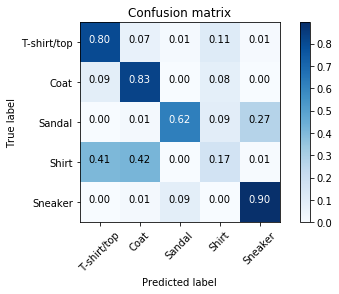

In [8]:
bm_04567.get_accuracy(bm_04567_best_model, max_acc_level = 3)
bm_04567.plot_confusion_matrix(bm_04567_best_model, normalize = True)

# Base model trained on 12389
Train a neural network using data observation from classes 12389 (6000 observation per class).

In [9]:
bm_12389 = BaseModel(dh, c_04567 = False)

In [10]:
bm_12389_best_model = keras.models.load_model('bm_12389_best_model') # only when trained already

## Training

In [27]:
# hyper param tuning
best, best_score, trials = bm_12389.tune_hyper_params(max_evals = 10)
best, best_score, trials

Test accuracy of model 0/10 is 98.24%:
Test accuracy of model 1/10 is 98.24%:
Test accuracy of model 2/10 is 98.26%:
Test accuracy of model 3/10 is 98.66%:
Test accuracy of model 4/10 is 98.60%:
Test accuracy of model 5/10 is 98.86%:
Test accuracy of model 6/10 is 98.60%:
Test accuracy of model 7/10 is 98.30%:
Test accuracy of model 8/10 is 98.32%:
Test accuracy of model 9/10 is 98.36%:


({'dropout0': 0.3639061292022006,
  'dropout1': 0.3485488701471488,
  'fc_size0': 4,
  'filter_size0': 4,
  'filter_size1': 3,
  'kernel_size0': 1,
  'kernel_size1': 1,
  'lr': 2,
  'num_layers': 0},
 0.98860000000000003,
 <hyperopt.base.Trials at 0x9a7386fe10>)

In [29]:
# model of about 0.988 accuracy of max_eval = 10
best_bm_12389_params =  {'dropout0': 0.3639061292022006,
                  'dropout1': 0.3485488701471488,
                  'fc_size0': 1024,
                  'filter_size0': 256,
                  'filter_size1': 128,
                  'kernel_size0': 4,
                  'kernel_size1': 4,
                  'num_layers': {'layers': 'two'},
                  'activation': 'relu',
                  'optimizer' : Adam,
                  'lr':0.00001,
                  'nb_epochs': 80
                  }
bm_12389_best_model = bm_12389.train_model(h_params = best_bm_12389_params, hyper_param_tuning = False)['model']
bm_12389_best_model.save('bm_12389_best_model')

Test accuracy of model 98.38%:


## Evaluation

*Accuracy of classifying the test set at level 1: 98.38%
*Accuracy of classifying the test set at level 2: 99.70%
*Accuracy of classifying the test set at level 3: 99.96%
Normalized confusion matrix
[[ 0.99  0.    0.01  0.    0.  ]
 [ 0.    0.99  0.01  0.    0.  ]
 [ 0.01  0.03  0.96  0.    0.  ]
 [ 0.    0.01  0.    0.97  0.  ]
 [ 0.    0.    0.    0.    1.  ]]


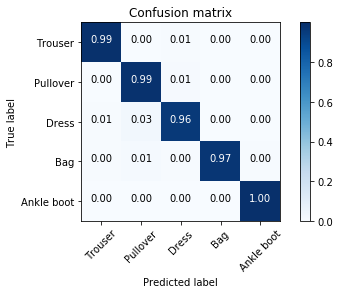

In [30]:
bm_12389.get_accuracy(bm_12389_best_model, max_acc_level = 3)
bm_12389.plot_confusion_matrix(bm_12389_best_model, normalize = True)

# Transfer learing pretrained on 12389
Train a NN to classify 04567. Use weights from the model of 12389 for pre-training.

In [11]:
tl = TransferLearning(dh, c_04567 = True)
tl.set_base_model(bm_12389_best_model)

In [13]:
tl_best_model = keras.models.load_model('tl_best_model.h5') #only when already trained

C:\Users\azika\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


## Training

In [56]:
# hyper param tuning
best_tl, best_score_tl, trials_tl = tl.tune_hyper_params(max_evals = 10)
best_tl, best_score_tl, trials_tl

D:\Google Drive\TUe\PDEng\Modules\Data Mining\CodeExampleAndFashionDataset\classes\transfer_learning.py:51: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("so...)`
  model = Model(input=self.base_model.input, output=predictions)


Test accuracy of model 0/10 is 66.76%:
Test accuracy of model 1/10 is 64.86%:
Test accuracy of model 2/10 is 68.84%:
Test accuracy of model 3/10 is 68.64%:
Test accuracy of model 4/10 is 64.84%:
Test accuracy of model 5/10 is 66.68%:
Test accuracy of model 6/10 is 65.88%:
Test accuracy of model 7/10 is 65.98%:
Test accuracy of model 8/10 is 66.34%:
Test accuracy of model 9/10 is 64.16%:


({'dropout0': 0.6439146194729336,
  'fc_size0': 3,
  'lr': 1,
  'train_conv0': 1,
  'train_conv1': 1,
  'train_conv2': 0},
 0.68840000000000001,
 <hyperopt.base.Trials at 0x930498ce48>)

In [123]:
tl_best_model = trials_tl.trials[2]['result']['model']
tl_best_model.save('tl_best_model.h5')

## Evaluation

*Accuracy of classifying the test set at level 1: 66.62%
*Accuracy of classifying the test set at level 2: 84.24%
*Accuracy of classifying the test set at level 3: 96.82%
Normalized confusion matrix
[[ 0.73  0.04  0.01  0.22  0.  ]
 [ 0.06  0.7   0.    0.24  0.  ]
 [ 0.    0.01  0.48  0.19  0.33]
 [ 0.23  0.31  0.    0.46  0.  ]
 [ 0.    0.    0.03  0.    0.97]]


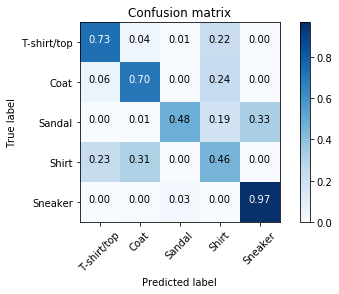

In [14]:
tl.get_accuracy(tl_best_model, max_acc_level = 3)
tl.plot_confusion_matrix(tl_best_model, normalize = True)

# Siamese NN

Use siamsese network from Koch et al.(2015).

In [15]:
sh = SiameseNN(dh)

Number of training pairs is 693 
Number of val pairs is 297 


In [16]:
sh_best_model = keras.models.load_model('sh_best_model_dropout.h5')

## Training

In [88]:
best_sh, best_score_sh, trials_sh = sh.tune_hyper_params(max_evals = 5)
best_sh, best_score_sh, trials_sh

Number of training pairs is 693 
Number of val pairs is 297 


D:\Google Drive\TUe\PDEng\Modules\Data Mining\CodeExampleAndFashionDataset\classes\siamese_nn.py:137: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  return Model(input=[input_a, input_b], output=flattened_weighted_distance)
D:\Google Drive\TUe\PDEng\Modules\Data Mining\CodeExampleAndFashionDataset\classes\siamese_nn.py:153: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  verbose = 1


{'filter_size0': 128, 'dropout1': 0.7378711038548462, 'nb_epochs': 80, 'optimizer': <class 'keras.optimizers.Adam'>, 'fc_size0': 128, 'kernel_size1': 3, 'lr': 0.01, 'filter_size1': 16, 'kernel_size0': 5, 'dropout0': 0.2827373679679297, 'num_layers': {'dropout2': 0.7458296700867776, 'kernel_size2': 3, 'layers': 'three', 'filter_size2': 32}, 'activation': 'relu'}
Epoch 1/80
693/693 [==============================] - 2s - loss: 2.1709 - acc: 0.4791     
Epoch 2/80
693/693 [==============================] - 1s - loss: 0.7411 - acc: 0.5166     
Epoch 3/80
693/693 [==============================] - 1s - loss: 0.7188 - acc: 0.5123     
Epoch 4/80
693/693 [==============================] - 1s - loss: 0.7186 - acc: 0.5123     
Epoch 5/80
693/693 [==============================] - 1s - loss: 0.7183 - acc: 0.5123     
Epoch 6/80
693/693 [==============================] - 2s - loss: 0.7180 - acc: 0.5123     
Test accuracy of model 0/5 is 47.14%:
{'filter_size0': 16, 'dropout1': 0.5433853847961816,

({'dropout0': 0.41391641755648506,
  'dropout1': 0.2824092419989655,
  'dropout2': 0.39661008838715317,
  'fc_size0': 2,
  'filter_size0': 3,
  'filter_size1': 5,
  'filter_size2': 4,
  'kernel_size0': 1,
  'kernel_size1': 1,
  'kernel_size2': 0,
  'lr': 0,
  'num_layers': 1},
 0.85521885521885521,
 <hyperopt.base.Trials at 0x936203a8d0>)

In [101]:
sh_best_model = trials_sh.trials[4]['result']['model']
sh_best_model.save('sh_best_model_dropout.h5')

## Evaluation

In [102]:
# compute verification accuracy
sh.get_accuracy(sh_best_model)[0]['acc']

* Accuracy of classifying the val set: 85.52%


0.85521885521885521

*Accuracy of classifying the test set at level 1: 43.84%
*Accuracy of classifying the test set at level 2: 65.86%
*Accuracy of classifying the test set at level 3: 77.34%
Normalized confusion matrix
[[ 0.24  0.17  0.07  0.22  0.31]
 [ 0.5   0.25  0.03  0.09  0.13]
 [ 0.01  0.    0.84  0.02  0.13]
 [ 0.26  0.17  0.11  0.22  0.24]
 [ 0.04  0.    0.32  0.    0.64]]


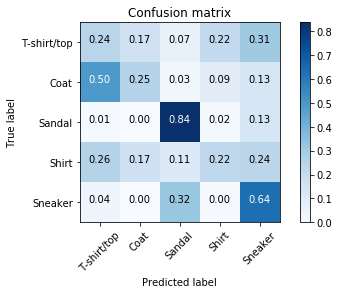

In [103]:
sh.compute_one_shot_accuracy(sh_best_model, max_acc_level = 3)
sh.plot_confusion_matrix(sh_best_model, normalize = True)

# Model ensemble

We tried to play with a stacked model ensemble, but we have not finished. Some commands below will not make sense

In [17]:
from sklearn import linear_model, datasets
import numpy as np
logreg = linear_model.LogisticRegression(C=1e5)

In [19]:
#y_test_pred_sh = sh.compute_one_shot_accuracy(sh_best_model, max_acc_level = 1)[0]['y_pred']
y_test_pred_bm = bm_04567.get_accuracy(bm_04567_best_model, max_acc_level = 1)[0]['y_pred']
y_test_pred_tl = tl.get_accuracy(tl_best_model, max_acc_level = 1)[0]['y_pred']


X_test_ens = np.stack((y_test_pred_bm, y_test_pred_tl), axis=-1)
y_test_ens = dh.y_test_04567

*Accuracy of classifying the test set at level 1: 66.26%
*Accuracy of classifying the test set at level 1: 66.62%


In [20]:
logreg.fit(X_test_ens, y_test_ens)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [21]:
y_pred_ens = logreg.predict(X_test_ens)
acc_ens = np.sum(y_test_ens == y_pred_ens) / len(y_test_ens)
acc_ens

0.6694

In [22]:
# Decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_test_ens, y_test_ens)
y_pred_ens = clf.predict(X_test_ens)
acc_ens = np.sum(y_test_ens == y_pred_ens) / len(y_test_ens)
acc_ens

0.7006